In [1]:
import h5py
import numpy as np

import time
import os
import string

import sys

import matplotlib.pylab as plt

import pandas as pd

# Writing strings to a file

In [2]:
sentence=['this','is','a','sentence']
data = []

for i in range(10000):
    data += sentence
print(len(data))
longest_word=len(max(data, key=len))
print('longest_word=',longest_word)

dt = h5py.special_dtype(vlen=str)

arr = np.array(data,dtype='S'+str(longest_word))

with h5py.File('outfile.h5','w') as h5File:
    dset = h5File.create_dataset('words',data=arr,dtype=dt, compression='gzip',compression_opts=9)
    print(dset.shape, dset.dtype)

    h5File.flush()
    h5File.close()

40000
longest_word= 8
(40000,) object


# Another shot at writing and reading strings

In [3]:
h5File=h5py.File('xxx.h5','w')

strList=['asas','asas','asas']

#dt = h5py.special_dtype(vlen=str)
dt = h5py.string_dtype(encoding='utf-8')

dset = h5File.create_dataset('strings',(len(strList),1),dtype=dt)
for i,s in enumerate(strList):
    dset[i] = s

h5File.flush()
h5File.close()



#################

f = h5py.File('xxx.h5', 'r')

print(list(f.keys()))

print(f['strings'])
x = f['strings']

for a in x:
    print(a)

['strings']
<HDF5 dataset "strings": shape (3, 1), type "|O">
[b'asas']
[b'asas']
[b'asas']


# Writing groups under groups

In [4]:
outfilename = 'foo.h5'

if os.path.exists(outfilename):
  os.remove(outfilename)
else:
  print(f"{outfilename} file does not exist")


f = h5py.File(outfilename,'w')
print(f.name)

grp = f.create_group("bar")
subgrp = grp.create_group("baz")

print(subgrp.name)

/
/bar/baz


# Timing tests for large writes

In [5]:
outfilename = 'data_TEST.h5'

if os.path.exists(outfilename):
  os.remove(outfilename)
else:
  print(f"{outfilename} file does not exist")

f = h5py.File(outfilename,'a')

In [6]:
#list(string.ascii_lowercase)

In [7]:
print(''.join(np.random.choice(list(string.ascii_lowercase), size=5)))

goidh


In [8]:
ngroups = 10
nchars_in_name = 5

ndatasets_in_group = 20

data = {}

# Make the groups
for n in range(ngroups):
    name = ''.join(np.random.choice(list(string.ascii_lowercase), size=nchars_in_name))
    
    # Keep track of our data
    data[name] = {}
    
    group_names = list(f.keys())
    
    if name not in group_names:
        grp = f.create_group(name)
        
        # Make the datasets in each group
        for nd in range(ndatasets_in_group):
            dname = ''.join(np.random.choice(list(string.ascii_lowercase), size=nchars_in_name))

            data[name][dname] = []
            # Create this at write time
            #dset = grp.create_dataset(dname, dtype='f')
            

In [9]:

print(list(f.keys()))

['byypd', 'dcuhp', 'gytoj', 'jnwos', 'ljdqo', 'ljhby', 'moznc', 'mzuuo', 'qllkl', 'xemyd']


In [10]:
def printname(name):
    print(name)
#f.visit(printname)

In [11]:

# Fill the data
nevents = 400000
nentries_per_group = (1, 10)

for group in data.keys():
    nentries = nevents*np.random.randint(nentries_per_group[0],nentries_per_group[1])
    print(f"{group}: {nentries}")
    for dset in data[group].keys():
        data[group][dset] = np.random.random(nentries)

gytoj: 2000000
ljdqo: 1600000
jnwos: 3200000
dcuhp: 800000
moznc: 2000000
xemyd: 800000
ljhby: 1200000
qllkl: 2000000
mzuuo: 1600000
byypd: 3600000


In [12]:
#data
time.time()

1687201498.800463

In [13]:
# Fill the data

start = time.time()
print(f"Starting to fill file with {nevents} events at {start}")

for group in data.keys():
    grp = f[group]
    print(f"Writing {group} and {len(data[group].keys())} datasets")
    for dname in data[group].keys():
        #print(list(f[group].keys()))
        if dname in f[group].keys():
            fullname = f"{group}/{dname}"
            del f[fullname]
        else:
            fullname = f"{group}/{dname}"
            #print(f"\t{fullname}")
            dset = grp.create_dataset(dname, data=data[group][dname],compression="gzip", compression_opts=9)


stop = time.time()
print(f"Finished filling file with {nevents} events at {stop}")
print(f"Time to fill: {stop-start:0.2f} seconds")

Starting to fill file with 400000 events at 1687201498.8093183
Writing gytoj and 20 datasets
Writing ljdqo and 20 datasets
Writing jnwos and 20 datasets
Writing dcuhp and 20 datasets
Writing moznc and 20 datasets
Writing xemyd and 20 datasets
Writing ljhby and 20 datasets
Writing qllkl and 20 datasets
Writing mzuuo and 20 datasets
Writing byypd and 20 datasets
Finished filling file with 400000 events at 1687201562.5952883
Time to fill: 63.79 seconds


In [14]:

f.close()

# Try opening the file

In [15]:
f = h5py.File(outfilename,'r')

In [16]:

def printname(name):
    print(name)
f.visit(printname)

byypd
byypd/cagks
byypd/cneko
byypd/ddbgi
byypd/ejhiu
byypd/fkiek
byypd/fqdac
byypd/frnam
byypd/hwmmj
byypd/kenfv
byypd/ldzmx
byypd/lwuqw
byypd/nuhii
byypd/pamzb
byypd/qbpxc
byypd/svcvg
byypd/uqtic
byypd/vyuwu
byypd/whqmp
byypd/xdatp
byypd/zxfti
dcuhp
dcuhp/bypxc
dcuhp/byqdt
dcuhp/ctryv
dcuhp/dgzti
dcuhp/eglfd
dcuhp/eieon
dcuhp/fipbh
dcuhp/ikxab
dcuhp/iulwa
dcuhp/kkcqk
dcuhp/lcapf
dcuhp/obwmq
dcuhp/oljct
dcuhp/pdmwa
dcuhp/qnnqj
dcuhp/udsbs
dcuhp/werke
dcuhp/wpunr
dcuhp/xvtfs
dcuhp/zrkmb
gytoj
gytoj/dahff
gytoj/dnomq
gytoj/fryih
gytoj/gawul
gytoj/hmzwt
gytoj/ibted
gytoj/jtgki
gytoj/jzyjz
gytoj/llhdv
gytoj/mavqg
gytoj/msecv
gytoj/rbyyr
gytoj/rtsbr
gytoj/tdbaa
gytoj/vnmij
gytoj/wpdhp
gytoj/xadrw
gytoj/xkfvl
gytoj/ybqvr
gytoj/ydaqc
jnwos
jnwos/aobhw
jnwos/blucr
jnwos/brqih
jnwos/dpccf
jnwos/dzypa
jnwos/efzsa
jnwos/etnuf
jnwos/flxyk
jnwos/ixayz
jnwos/kjyby
jnwos/kzdve
jnwos/mdnfg
jnwos/mnznh
jnwos/pvjug
jnwos/qhdkn
jnwos/qprmf
jnwos/tbsim
jnwos/tdgoh
jnwos/uqqoh
jnwos/xhxrh
ljdqo
ljdqo/aodd

In [17]:
k0 = list(f.keys())[0]
k1 = list(f[k0].keys())[0]

x = f[f'{k0}/{k1}'][()] # This last bit returns a numpy array

print(type(x))
print(x)

#x.values

print(len(x))

<class 'numpy.ndarray'>
[0.20661127 0.48365812 0.02610665 ... 0.47626454 0.24923755 0.51743188]
3600000


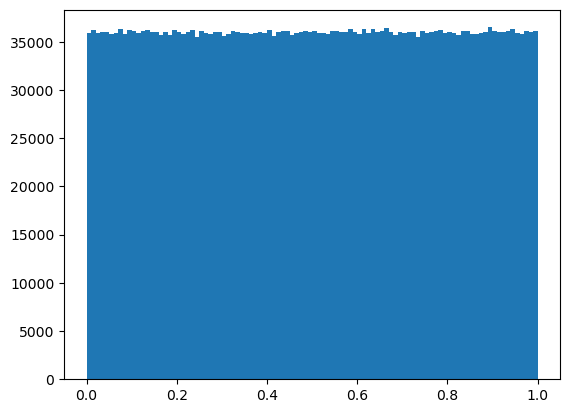

In [18]:
plt.hist(x,bins=100);

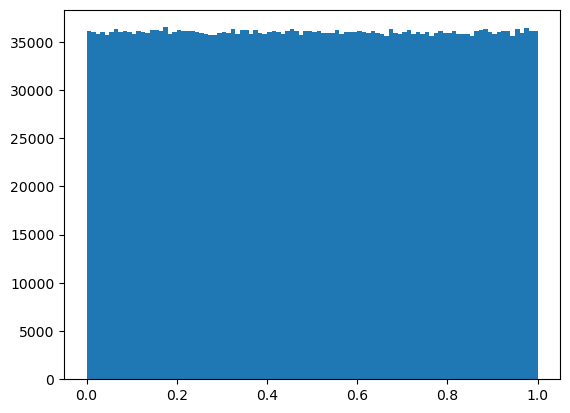

In [19]:
plt.hist(np.random.random(len(x)),bins=100);

In [20]:
grp = f[k0]
print(grp)

<HDF5 group "/byypd" (20 members)>


In [21]:
x = grp[k1][()]

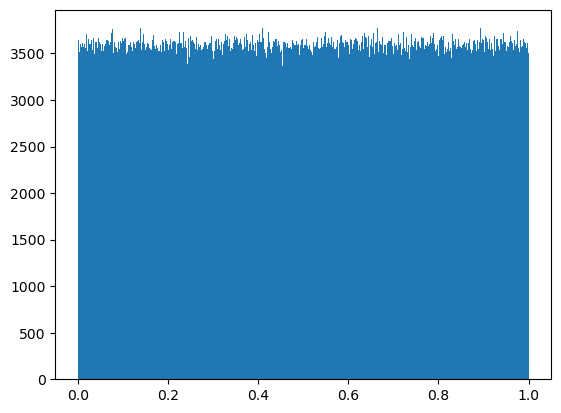

In [22]:
len(x)
plt.hist(x,bins=1000);

In [23]:
for group in f.keys():
    grp = f[group]
    print(group)
    for i,dname in enumerate(f[group].keys()):
        fullname = f"{group}/{dname}"
        #print(f[fullname])
        #if i == 0:
        #    plt.figure()
        #    plt.hist(f[fullname],bins=100)

byypd
dcuhp
gytoj
jnwos
ljdqo
ljhby
moznc
mzuuo
qllkl
xemyd


In [24]:

f.close()

# Writing a header

In [25]:
# Just writing strings

h5File=h5py.File('xxx.h5','w')

strList=['asas','asas','asas']

#dt = h5py.special_dtype(vlen=str)
dt = h5py.string_dtype(encoding='utf-8')

dset = h5File.create_dataset('strings',(len(strList),1),dtype=dt)
for i,s in enumerate(strList):
    dset[i] = s

h5File.flush()
h5File.close()



#################

f = h5py.File('xxx.h5', 'r')

print(list(f.keys()))

print(f['strings'])
x = f['strings']

for a in x:
    print(a)

['strings']
<HDF5 dataset "strings": shape (3, 1), type "|O">
[b'asas']
[b'asas']
[b'asas']


In [26]:
# Writing a header

filename = 'header_test.h5'

if os.path.exists(filename):
    os.remove(filename)
else:
    print("The file does not exist")


h5File=h5py.File(filename,'w')

header_group_name = 'header'

header_strings = []
header_strings.append('#*********************************************************************)')
header_strings.append('# Tag name for the run (one word)                                    *')
header_strings.append('#*********************************************************************')
header_strings.append('  tag_1 = run_tag ! name of the run')
header_strings.append('#*********************************************************************')
header_strings.append('# Number of events and rnd seed                                      *')
header_strings.append('# Warning: Do not generate more than 1M events in a single run       *')
header_strings.append('# If you want to run Pythia, avoid more than 50k events in a run.    *')
header_strings.append('#*********************************************************************')
header_strings.append('  1000  = nevents ! Number of unweighted events requested)')
header_strings.append(' 66 = iseed ! rnd seed (0=assigned automatically=default))')
header_strings.append('#*********************************************************************')
header_strings.append('# Collider type and energy                                           *')
header_strings.append('# lpp: 0=No PDF, 1=proton, -1=antiproton, 2=photon from proton,      *')
header_strings.append('#                                         3=photon from electron     *')
header_strings.append('#*********************************************************************')
header_strings.append('  1 = lpp1 ! beam 1 type')
header_strings.append('  1 = lpp2 ! beam 2 type')
header_strings.append('  6500.0    = ebeam1 ! beam 1 total energy in GeV')
header_strings.append('  6500.0    = ebeam2 ! beam 2 total energy in GeV')
header_strings.append('')


#strList=['asas','asas','asas']

dt = h5py.string_dtype(encoding='utf-8')

grp = h5File.create_group(header_group_name)
dset = grp.create_dataset('lines',(len(header_strings),1),dtype=dt)

print(len(header_strings))
print(dset)

for i,s in enumerate(header_strings):
    print(s)
    dset[i] = s

h5File.flush()
h5File.close()



#################

f = h5py.File(filename, 'r')

print(list(f.keys()))

print(f[header_group_name])
grp = f[header_group_name]

for line in grp['lines']:
    print(line[0].decode()) # Need the .decode because these are stored as binary

The file does not exist
21
<HDF5 dataset "lines": shape (21, 1), type "|O">
#*********************************************************************)
# Tag name for the run (one word)                                    *
#*********************************************************************
  tag_1 = run_tag ! name of the run
#*********************************************************************
# Number of events and rnd seed                                      *
# Warning: Do not generate more than 1M events in a single run       *
# If you want to run Pythia, avoid more than 50k events in a run.    *
#*********************************************************************
  1000  = nevents ! Number of unweighted events requested)
 66 = iseed ! rnd seed (0=assigned automatically=default))
#*********************************************************************
# Collider type and energy                                           *
# lpp: 0=No PDF, 1=proton, -1=antiproton, 2=photon from pro

In [27]:
# https://pythonhow.com/how/check-if-a-string-is-a-float/#:~:text=To%20check%20if%20a%20string%20is%20a%20number%20(float)%20in,casted%20to%20float%20or%20not.

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

def is_int(string):
    try:
        int(string)
        return True
    except ValueError:
        return False


def check_data_type_of_string(string):
    # First, check float
    if is_int(string):
        return 'int'
    
    # Check float has to come after check int
    elif is_float(string):
        return 'float'
    
    else:
        return 'str'

    
print(check_data_type_of_string('10.0'))
print(check_data_type_of_string('10'))
print(check_data_type_of_string('ten eight'))

float
int
str


In [28]:
# Writing a header

filename = 'header_test_values.h5'

if os.path.exists(filename):
    os.remove(filename)
else:
    print("The file does not exist")


h5File=h5py.File(filename,'w')

header_group_name = 'header_values'

header_strings = []
header_strings.append('#*********************************************************************)')
header_strings.append('# Tag name for the run (one word)                                    *')
header_strings.append('#*********************************************************************')
header_strings.append('  tag_1 = run_tag ! name of the run')
header_strings.append('#*********************************************************************')
header_strings.append('# Number of events and rnd seed                                      *')
header_strings.append('# Warning: Do not generate more than 1M events in a single run       *')
header_strings.append('# If you want to run Pythia, avoid more than 50k events in a run.    *')
header_strings.append('#*********************************************************************')
header_strings.append('  1000  = nevents ! Number of unweighted events requested)')
header_strings.append(' 66 = iseed ! rnd seed (0=assigned automatically=default))')
header_strings.append('#*********************************************************************')
header_strings.append('# Collider type and energy                                           *')
header_strings.append('# lpp: 0=No PDF, 1=proton, -1=antiproton, 2=photon from proton,      *')
header_strings.append('#                                         3=photon from electron     *')
header_strings.append('#*********************************************************************')
header_strings.append('  1 = lpp1 ! beam 1 type')
header_strings.append('  1 = lpp2 ! beam 2 type')
header_strings.append('  6500.0    = ebeam1 ! beam 1 total energy in GeV')
header_strings.append('  6500.0    = ebeam2 ! beam 2 total energy in GeV')
header_strings.append('')

# Parse the file

values = []
parameters = []
comments = []
datatypes = []

for h in header_strings:
    #print(h)
    if len(h)>0 and h[0] != '#':
        a = h.split('=')[0].strip()
        b = h.split('=')[1].split('!')[0].strip()
        c = h.split('!')[1].strip()
        
        print(a,b,c)

        values.append(a)
        parameters.append(b)
        comments.append(c)
        datatypes.append(check_data_type_of_string(a))

print(values)
print(parameters)
print(comments)
print(datatypes)
####################################################################
        
        
# Write to h5py
dt = h5py.string_dtype(encoding='utf-8')

grp = h5File.create_group(header_group_name)
dset1 = grp.create_dataset('values',(len(values),1),dtype=dt)
dset2 = grp.create_dataset('parameters',(len(parameters),1),dtype=dt)
dset3 = grp.create_dataset('comments',(len(comments),1),dtype=dt)
dset4 = grp.create_dataset('datatypes',(len(datatypes),1),dtype=dt)

print(len(values))
print(dset)

for i in range(len(values)):
    dset1[i] = values[i]
    dset2[i] = parameters[i]
    dset3[i] = comments[i]
    dset4[i] = datatypes[i]

h5File.flush()
h5File.close()



#################

f = h5py.File(filename, 'r')

print(list(f.keys()))

print(f[header_group_name])
group = f[header_group_name]


# Why is each entry a list of one val? Is it because we do the (len(values),1) above?

for a in group:
    print("-----------")
    print(a)
    for values in group[a]:
        print(values)

The file does not exist
tag_1 run_tag name of the run
1000 nevents Number of unweighted events requested)
66 iseed rnd seed (0=assigned automatically=default))
1 lpp1 beam 1 type
1 lpp2 beam 2 type
6500.0 ebeam1 beam 1 total energy in GeV
6500.0 ebeam2 beam 2 total energy in GeV
['tag_1', '1000', '66', '1', '1', '6500.0', '6500.0']
['run_tag', 'nevents', 'iseed', 'lpp1', 'lpp2', 'ebeam1', 'ebeam2']
['name of the run', 'Number of unweighted events requested)', 'rnd seed (0=assigned automatically=default))', 'beam 1 type', 'beam 2 type', 'beam 1 total energy in GeV', 'beam 2 total energy in GeV']
['str', 'int', 'int', 'int', 'int', 'float', 'float']
7
<Closed HDF5 dataset>
['header_values']
<HDF5 group "/header_values" (4 members)>
-----------
comments
[b'name of the run']
[b'Number of unweighted events requested)']
[b'rnd seed (0=assigned automatically=default))']
[b'beam 1 type']
[b'beam 2 type']
[b'beam 1 total energy in GeV']
[b'beam 2 total energy in GeV']
-----------
datatypes
[b's

In [29]:
x = f['header_values/comments']

print(x[0])

[b'name of the run']


In [30]:
# Build a dictionary

#################

d = {}

f = h5py.File(filename, 'r')

print(list(f.keys()))

print(f[header_group_name])
group = f[header_group_name]

comments = group['comments']
parameters = group['parameters']
values = group['values']
datatypes = group['datatypes']

print(parameters[0])

nvals = len(comments)
print(nvals)

for i in range(nvals):
    value = values[i][0].decode()
    datatype = datatypes[i][0].decode()
    if datatype=='float':
        value = float(value)
    elif datatype=='int':
        value = int(value)
    d[parameters[i][0].decode()] = {'value':value , 'comments': comments[i][0].decode()}

      
#print(d)
for key in d.keys():
    print(key, d[key])
print()
    

['header_values']
<HDF5 group "/header_values" (4 members)>
[b'run_tag']
7
run_tag {'value': 'tag_1', 'comments': 'name of the run'}
nevents {'value': 1000, 'comments': 'Number of unweighted events requested)'}
iseed {'value': 66, 'comments': 'rnd seed (0=assigned automatically=default))'}
lpp1 {'value': 1, 'comments': 'beam 1 type'}
lpp2 {'value': 1, 'comments': 'beam 2 type'}
ebeam1 {'value': 6500.0, 'comments': 'beam 1 total energy in GeV'}
ebeam2 {'value': 6500.0, 'comments': 'beam 2 total energy in GeV'}



In [31]:
np.array(parameters).astype(str)

array([['run_tag'],
       ['nevents'],
       ['iseed'],
       ['lpp1'],
       ['lpp2'],
       ['ebeam1'],
       ['ebeam2']], dtype='<U7')

In [32]:
# Build a dataframe

#################

d = {'parameters':[], 'values':[], 'comments':[], 'dtypes':[]}
f = h5py.File(filename, 'r')

print(list(f.keys()))
print(f[header_group_name])

group = f[header_group_name]
comments = group['comments']
parameters = group['parameters']
values = group['values']
datatypes = group['datatypes']

print(parameters[0])

nvals = len(comments)
print(nvals)

for i in range(nvals):
    d['parameters'].append(parameters[i][0].decode())
    d['values'].append(values[i][0].decode())
    d['dtypes'].append(datatypes[i][0].decode())
    d['comments'].append(comments[i][0].decode())

for key in d.keys():
    print(key, d[key])
print()

df = pd.DataFrame.from_dict(d)

df

['header_values']
<HDF5 group "/header_values" (4 members)>
[b'run_tag']
7
parameters ['run_tag', 'nevents', 'iseed', 'lpp1', 'lpp2', 'ebeam1', 'ebeam2']
values ['tag_1', '1000', '66', '1', '1', '6500.0', '6500.0']
comments ['name of the run', 'Number of unweighted events requested)', 'rnd seed (0=assigned automatically=default))', 'beam 1 type', 'beam 2 type', 'beam 1 total energy in GeV', 'beam 2 total energy in GeV']
dtypes ['str', 'int', 'int', 'int', 'int', 'float', 'float']



,parameters,values,comments,dtypes
0,run_tag,tag_1,name of the run,str
1,nevents,1000,Number of unweighted events requested),int
2,iseed,66,rnd seed (0=assigned automatically=default)),int
3,lpp1,1,beam 1 type,int
4,lpp2,1,beam 2 type,int
5,ebeam1,6500.0,beam 1 total energy in GeV,float
6,ebeam2,6500.0,beam 2 total energy in GeV,float
